# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [19]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [20]:
df.shape

(30181, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
ID        30181 non-null int64
Name      30181 non-null object
Sex       30181 non-null object
Age       30181 non-null float64
Height    30181 non-null float64
Weight    30181 non-null float64
Team      30181 non-null object
NOC       30181 non-null object
Games     30181 non-null object
Year      30181 non-null int64
Season    30181 non-null object
City      30181 non-null object
Sport     30181 non-null object
Event     30181 non-null object
Medal     30181 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [22]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [23]:
# %matplotlib inline
# import zipfile
# import numpy as np
# import pandas as pd
# import seaborn as sns

# z = zipfile.ZipFile("../data/athlete_events.zip")
# df = pd.read_csv(z.open("athlete_events.csv"))
# df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
# Your code here
goldMedal = df[(df.Medal == "Gold")]
silverMedal = df[(df.Medal == "Silver")]
bronzeMedal = df[(df.Medal == "Bronze")]
allMedals = df[(df.Medal.notnull())]
print("Gold Medals: ", goldMedal["ID"].count())
print("Silver Medals: ", silverMedal["ID"].count())
print("Bronze Medals: ", bronzeMedal["ID"].count())
print("All Medals: ", allMedals["ID"].count())

Gold Medals:  10167
Silver Medals:  9866
Bronze Medals:  10148
All Medals:  30181


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [24]:
# Your code here
colGoldMedal = goldMedal.Team.value_counts().reset_index(name="Medal")
print(colGoldMedal["index"][0])

United States


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [25]:
# Your code here
pd.crosstab(df["Sex"], df["Sport"], margins=True)

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,...,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,180,100,0,1239,73,0,390,35,147,24,...,72,84,14,15,0,469,191,105,68,10350
M,174,106,2,2409,81,333,610,33,241,259,...,72,89,15,15,8,489,573,427,899,19831
All,354,206,2,3648,154,333,1000,68,388,283,...,144,173,29,30,8,958,764,532,967,30181


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [26]:
# Your code here
iceHockeyWomen = df[(df.Sport == "Ice Hockey") & (df.Sex == "F")]
colWomen = iceHockeyWomen["ID"].count()
sumAgeWomen = iceHockeyWomen["Age"].sum()
averge = np.average(iceHockeyWomen["Age"].tolist())
std = np.std(iceHockeyWomen["Age"].tolist())
print(averge)
print(std)

24.42
4.353190400920533


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [27]:
# Your code here
colBronzeMedal = bronzeMedal[bronzeMedal.Sex == "F"].Team.value_counts().reset_index(name="Medal")
print(colBronzeMedal["index"][0])

United States


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

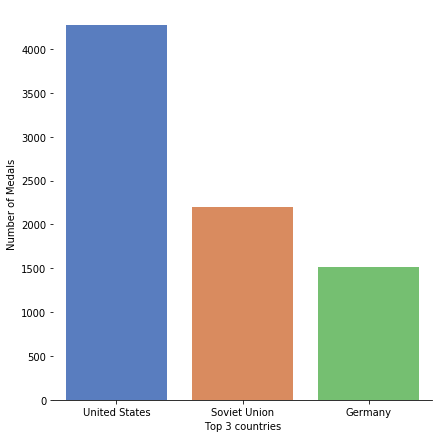

In [34]:
# Your code here
totalMedal =  df[(df.Medal.notnull())].Team.value_counts().reset_index(name="Medal").head(3)
g = sns.catplot(x="index", y="Medal", data=totalMedal, height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 3 countries")
g.set_ylabels("Number of Medals")

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

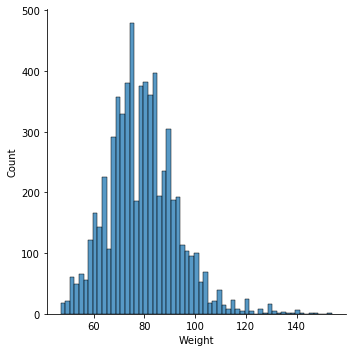

In [39]:
# Your code here
silverMenMedal = df[(df.Medal == "Silver")&(df.Sex == "M")]
sns.displot(silverMenMedal["Weight"]);

**8. Постройте boxplot для возраста участника в зависимости от медали**

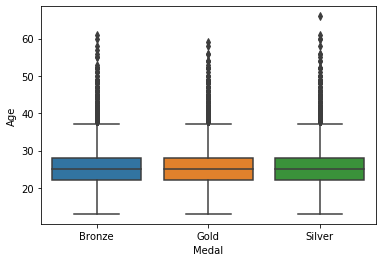

In [41]:
# Your code here
allMedals = df[(df.Medal.notnull())]
sns.boxplot(x="Medal", y="Age", data=allMedals)

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

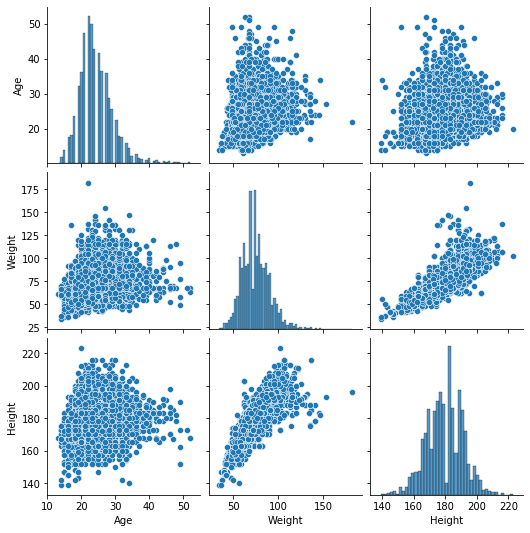

In [42]:
# Your code here
fromUSA = df[(df.Team == "United States")]
sns.pairplot(fromUSA[["Age", "Weight", "Height"]])